In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [2]:
data = pd.read_csv('salary.csv')
data

,Company,Experience,Salary
0,A,0.0,30890
1,A,2.1,38020
2,A,2.2,40690
3,A,2.7,39040
4,A,2.7,40080
...,...,...,...
58,C,8.4,62370
59,C,8.7,57100
60,C,9.1,58860
61,C,9.8,66140


In [3]:
company = data['Company']
y = data['Salary']
x1 = data['Experience']
x2 = np.zeros(len(y))
x3 = np.zeros(len(y))
for i in range(len(y)):
    if company[i] == 'A':
        x2[i] = 1
    if company[i] == 'B':
        x3[i] = 1

xa = x1.loc[data['Company']=='A']
ya = y.loc[data['Company']=='A']
xb = x1.loc[data['Company']=='B']
yb = y.loc[data['Company']=='B']
xc = x1.loc[data['Company']=='C']
yc = y.loc[data['Company']=='C']

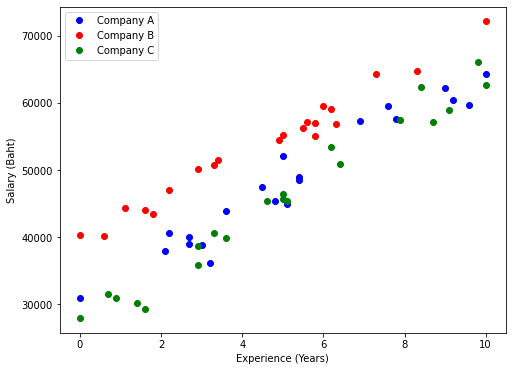

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(xa, ya, 'ob', label='Company A')
plt.plot(xb, yb, 'or', label='Company B')
plt.plot(xc, yc, 'og', label='Company C')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Baht)')
plt.legend(loc='upper left')
plt.show()

In [5]:
# y = β0 + β1x1
def model1(beta, x):
    y_model = beta[0] + beta[1]*x
    return y_model


def model1_res(beta, x, y):
    y_model = model1(beta, x)
    res = np.sum((y-y_model) ** 2)
    return res


beta_guess = [0, 0]
fit_a = minimize(model1_res, beta_guess, args=(xa, ya))
fit_b = minimize(model1_res, beta_guess, args=(xb, yb))
fit_c = minimize(model1_res, beta_guess, args=(xc, yc))

beta_a = fit_a.x
beta_b = fit_b.x
beta_c = fit_c.x

ya_pred1 = model1(beta_a, xa)
yb_pred1 = model1(beta_b, xb)
yc_pred1 = model1(beta_c, xc)


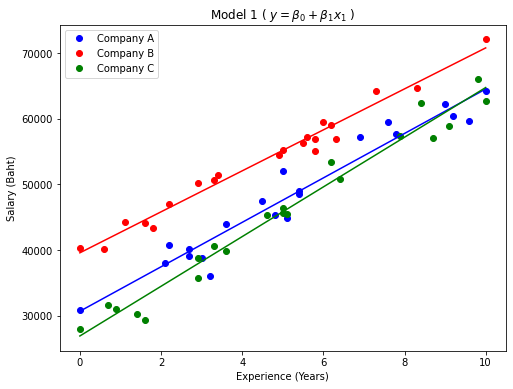

In [6]:
plt.figure(figsize=(8, 6))

plt.plot(xa, ya, 'ob', label='Company A')
plt.plot(xb, yb, 'or', label='Company B')
plt.plot(xc, yc, 'og', label='Company C')

plt.plot(xa, ya_pred1, '-b')
plt.plot(xb, yb_pred1, '-r')
plt.plot(xc, yc_pred1, '-g')

plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Baht)')
plt.title('Model 1 ( $y = β_0 + β_1x_1$ )')
plt.legend(loc='upper left')
plt.show()

In [7]:
# y = β0 + β1x1 + β2x2 + β3x3
def model2(beta, x1, x2, x3):
    y_model = beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3
    return y_model


def model2_res(beta, x1, x2, x3, y):
    y_model = model2(beta, x1, x2, x3)
    res = np.sum((y-y_model) ** 2)
    return res


beta_guess = [0, 0, 0, 0]
fit_model2 = minimize(model2_res, beta_guess, args=(x1, x2, x3, y))

beta_model2 = fit_model2.x

ya_pred2 = model2(beta_model2, xa, np.ones(21), np.zeros(21))
yb_pred2 = model2(beta_model2, xb, np.zeros(21), np.ones(21))
yc_pred2 = model2(beta_model2, xc, np.zeros(21), np.zeros(21))


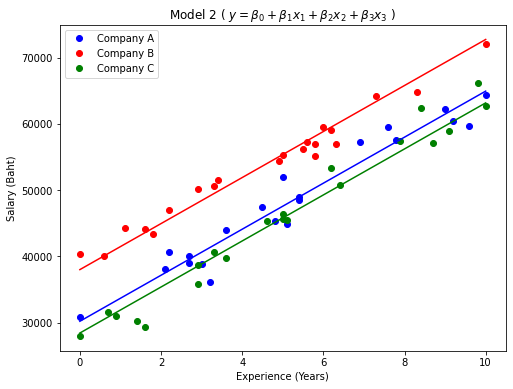

In [8]:
plt.figure(figsize=(8, 6))

plt.plot(xa, ya, 'ob', label='Company A')
plt.plot(xb, yb, 'or', label='Company B')
plt.plot(xc, yc, 'og', label='Company C')

plt.plot(xa, ya_pred2, '-b')
plt.plot(xb, yb_pred2, '-r')
plt.plot(xc, yc_pred2, '-g')

plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Baht)')
plt.title('Model 2 ( $y = β_0 + β_1x_1 + β_2x_2 + β_3x_3$ )')
plt.legend(loc='upper left')
plt.show()

3. Let’s reflect on what we did in part (1) and (2). In part (1) we fitted for each company separately, which resulted in 6 parameters in total. In contrast, in part (2) we fitted all three companies together, which resulted in only 4 parameters. What is missing? Could the model in part (2) be able to capture the relationships as well as the model in part (1)? Explain what is going on.

- ในข้อ 1 (model1) มี 6 parameters คือ
    - xa, xb, xc (experience แยกแต่ละ company)
    - ya, yb, yc (salary แยกแต่ละ company)
- ในข้อ 2 (model1) มี 4 parameters คือ
    - x1 (experience รวมทุก company)
    - x2 (array 1,0 ที่เมื่อแถว company = A จะเป็น 1 นอกนั้นเป็น 0)
    - x3 (array 1,0 ที่เมื่อแถว company = b จะเป็น 1 นอกนั้นเป็น 0)
    - y (salary แยกแต่ละ company)
    - อะไรหายไป? การแยกข้อมูลเป็นแต่ละ company
- model2 ดีไม่เท่า model1 เพราะว่า model2 คิดความชันร่วมกัน ทำให้เมื่อมองแยกแต่ละ company error ของความชันจะสูงขึ้น

In [9]:
# y = β0 + β1x1 + β2x2 + β3x3 + β12x1x2 + β13x1x3
def model3(beta, x1, x2, x3):
    y_model = beta[0] + beta[1]*x1 + beta[2]*x2 + \
        beta[3]*x3 + beta[4]*x1*x2+beta[5]*x1*x3
    return y_model


def model3_res(beta, x1, x2, x3, y):
    y_model = model3(beta, x1, x2, x3)
    res = np.sum((y-y_model) ** 2)
    return res


beta_guess = [0, 0, 0, 0, 0, 0]
fit_model3 = minimize(model3_res, beta_guess, args=(x1, x2, x3, y))

beta_model3 = fit_model3.x

ya_pred3 = model3(beta_model3, xa, np.ones(21), np.zeros(21))
yb_pred3 = model3(beta_model3, xb, np.zeros(21), np.ones(21))
yc_pred3 = model3(beta_model3, xc, np.zeros(21), np.zeros(21))


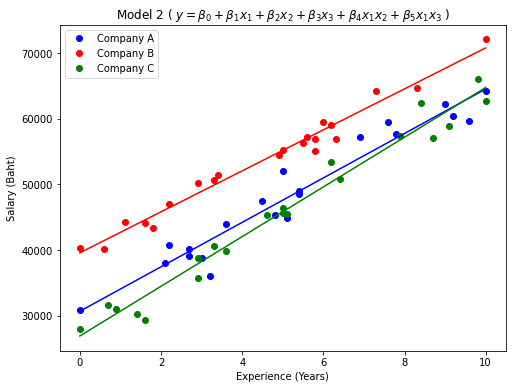

In [11]:
plt.figure(figsize=(8, 6))

plt.plot(xa, ya, 'ob', label='Company A')
plt.plot(xb, yb, 'or', label='Company B')
plt.plot(xc, yc, 'og', label='Company C')

plt.plot(xa, ya_pred3, '-b')
plt.plot(xb, yb_pred3, '-r')
plt.plot(xc, yc_pred3, '-g')

plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Baht)')
plt.title('Model 2 ( $y = β_0 + β_1x_1 + β_2x_2 + β_3x_3 + β_4x_1x_2 + β_5x_1x_3$ )')
plt.legend(loc='upper left')
plt.show()

4. Now, let’s include the interaction terms x1x2 and x1x3 into the mix. Fit linear model including these interaction terms, given in the equation below, to the whole data set.
y = β0 + β1x1 + β2x2 + β3x3 + β12x1x2 + β13x1x3
Also, explain why the remaining second-order interaction term, x2x3, is meaningless.

- เพราะว่า x2*x3 = 0

5. Notice that the model in part (4) has the same number of parameters as the model in part (1). Do they capture the same amount of information? What are the relationships between the parameters of these two models? Explain what is going on.

- model1 -> y = β0 + β1x1
    - ความชันแต่ละ company = β1
- model3 (part4) -> y = β0 + β1x1 + β2x2 + β3x3 + β4x1x2 + β5x1x3
    - ความชัน company A = β1 + β4
    - ความชัน company B = β1 + β5
    - ความชัน company C = β1
    - จะเห็นว่า A, B, C มีความชันแยกกัน(และมีจุดตัดแกนแยกกันด้วย) แต่แค่อยู่รวมกันในสมการเดียวกัน เหมือนเอาสมการใน model1 มารวมกันเป็นสมการเดียว = model3 (part4)